In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from botorch.models.transforms import Normalize, Standardize
from matplotlib import cm

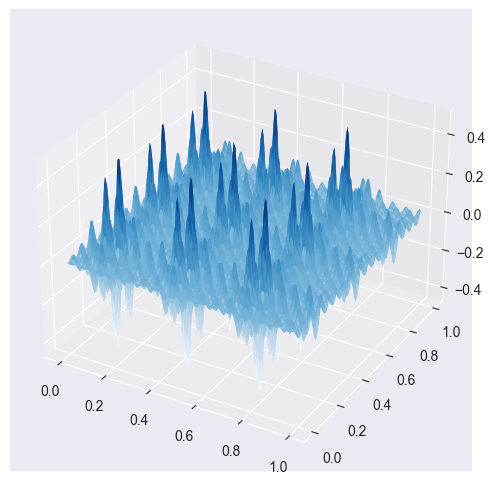

In [12]:
# Shubert - dim*3^dim global optima, many local optima, many smooth but localized optima (~760)
# x_i in [-10, 10]
def shubert_2d(x1, x2):
    x = [(x1 * 20.0) - 10., (x2 * 20.0) - 10.]
    outer = torch.ones_like(x1)
    for i in range(2):
        inner = torch.zeros_like(x1)
        for j in range(5):
            inner += j*torch.cos( (j+1)*x[i] + j)
        outer = outer * inner
    return outer / 186.73

x1 = torch.arange(0., 1., 0.005)
x2 = torch.arange(0., 1., 0.005)
X1, X2 = torch.meshgrid([x1, x2])
Z = shubert_2d(X1, X2)
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,6))
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.inferno, shade=False)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,6))

from matplotlib.colors import LightSource
ls = LightSource(270, 45)
rgb = ls.shade(Z.numpy(), cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(X1, X2, Z, cmap='Blues', shade=False, cstride=1, rstride=1, linewidth=0)

In [17]:
def shubert_2d(X):
    x1, x2 = X[..., 0], X[..., 1]
    x = [(x1 * 20.0) - 10., (x2 * 20.0) - 10.]
    outer = torch.ones_like(x1)
    for i in range(2):
        inner = torch.zeros_like(x1)
        for j in range(5):
            inner += j*torch.cos( (j+1)*x[i] + j)
        outer = outer * inner
    return outer / 186.73

In [18]:
def outcome_objective(x):
    """wrapper for the outcome objective function"""
    return shubert_2d(x).type_as(x).unsqueeze(-1)

In [19]:
dtype = torch.double

test_x = torch.tensor([0.2, 0.7], dtype=dtype)

In [20]:
outcome_objective(test_x)

tensor([-0.0208], dtype=torch.float64)